In [1]:
!pip install kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prashantkrmali","key":"073f54ca69dde0d42432fbf45a36a98a"}'}

In [4]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Dataset API Command
!kaggle datasets download -d samuelcortinhas/credit-card-approval-clean-data

  0% 0.00/19.0k [00:00<?, ?B/s]
100% 19.0k/19.0k [00:00<00:00, 27.8MB/s]


In [6]:
%%time

from zipfile import ZipFile

file_name = '/content/credit-card-approval-clean-data.zip' # the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done
CPU times: user 3.95 ms, sys: 2.24 ms, total: 6.2 ms
Wall time: 25.2 ms


In [7]:
# reading the dataset
df = pd.read_csv('/content/clean_dataset.csv')

In [8]:
print(f"Shape of Dataset: {df.shape}")
print(f"Total Number of columns: {len(df.columns)}")
print(f"Count of Null enteries: {df.isna().sum()}")

Shape of Dataset: (690, 16)
Total Number of columns: 16
Count of Null enteries: Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [9]:
df.sample(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
427,1,37.50,0.835,1,1,Education,White,0.040,0,0,0,0,ByBirth,120,5,0
159,1,34.08,0.080,0,0,CommunicationServices,Asian,0.040,1,1,1,1,ByBirth,280,2000,1
553,1,38.58,3.335,1,1,Industrials,White,4.000,1,1,14,0,ByBirth,383,1344,1
458,1,36.17,5.500,1,1,ConsumerDiscretionary,Asian,5.000,0,0,0,0,ByBirth,210,687,0
111,0,24.50,1.040,0,0,Healthcare,Latino,0.500,1,1,3,0,ByBirth,180,147,0
588,1,26.67,1.750,0,0,Energy,White,1.000,1,1,5,1,ByBirth,160,5777,1
376,1,28.67,14.500,1,1,Real Estate,White,0.125,0,0,0,0,ByBirth,0,286,0
484,1,34.67,1.080,1,1,CommunicationServices,White,1.165,0,0,0,0,ByOtherMeans,28,0,0
169,1,37.50,1.125,0,0,Real Estate,White,1.500,0,0,0,1,ByBirth,431,0,1
362,1,26.83,0.540,1,1,Financials,Latino,0.000,0,0,0,0,ByBirth,100,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [11]:
# changing the datatypes
df[['Gender', 'Married', 'BankCustomer', 'Industry',
    'Ethnicity', 'PriorDefault','Employed',
    'DriversLicense', 'Citizen', 'Approved']] = df[['Gender', 'Married', 'BankCustomer',
                                                    'Industry','Ethnicity', 'PriorDefault',
                                                    'Employed','DriversLicense', 'Citizen','Approved']].astype(str)

In [12]:
print(df.dtypes)

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode             int64
Income              int64
Approved           object
dtype: object


In [13]:
categorical = []
numeric = []

columns = df.columns.to_list()

for col in columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    numeric.append(col)
  else:
    categorical.append(col)

print(f"Categorical length & columns: {len(categorical)} and {categorical}")
print(f"Numeric length & columns: {len(numeric)} and {numeric}")

Categorical length & columns: 10 and ['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approved']
Numeric length & columns: 6 and ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']


No null value available in the dataset. Proceeding further with the analysis.

## **1. Univariate Analysis**

Continuous Variables and Categorical Variables




### **1.1 Univariate Analysis of continuous Variables**

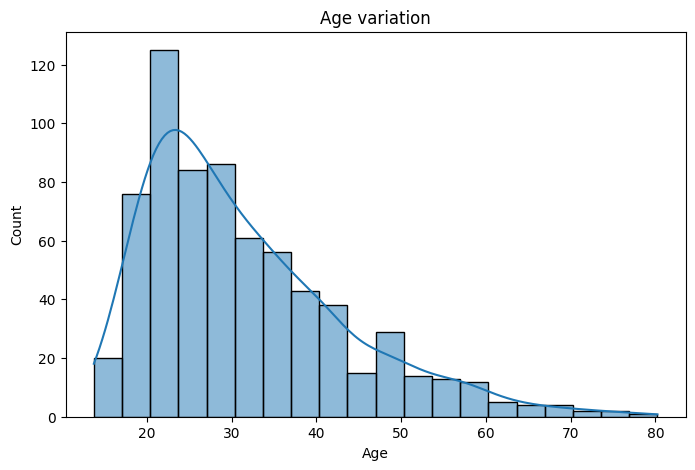

In [14]:
# Plotting histogram to visualize the age variation
ax, fig = plt.subplots(figsize=(8,5))
p = sns.histplot(data=df, x="Age", kde=True, bins=20)
fig.set_title("Age variation")
plt.show()

**Observation:** As per the above plot, we find that very few people applied for credit cards after turning `50`. Also, people between the ages of `20-40` applied the most as compared to other groups. This provides us an insight that people tend to apply for credit cards in the early phase of their lives. Hence, credit card issuing firms can target people in the age group `20–40`.

The histogram for the YearsEmployed column is shown below.



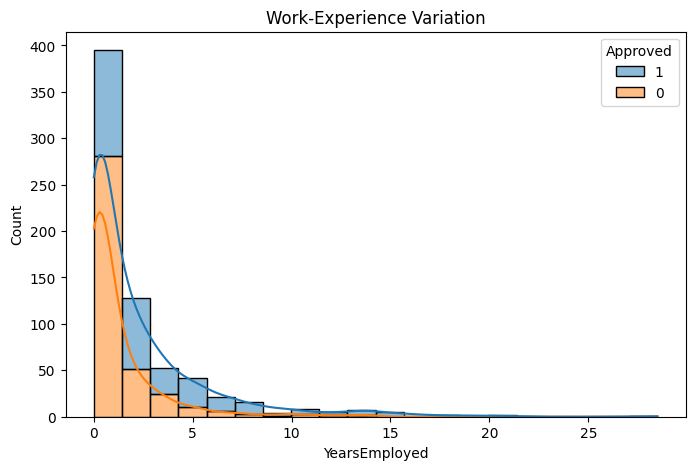

In [15]:
# Plotting histogram on YearsEmployed
print('The histogram for the YearsEmployed column is shown below.\n')
fig, ax = plt.subplots(figsize=(8,5))
p = sns.histplot(data=df, x="YearsEmployed", kde=True, bins=20, hue='Approved', multiple='stack')
ax.set_title("Work-Experience Variation")
plt.show()

**Observation:** The above histogram shows that people tend to apply for credit cards at a very early stage of their careers. The lower frequency in the region above 10 YOE may be due to the reason that people apply for credit cards in an early stage of their careers. Hence, they possess credit cards when they are professionally experienced (`>10 YOE`). Thus, they don't need to apply for cards in that stage.

### **1.2 Univariate Analysis of Categorical Variables**

<ipython-input-16-edfd65700947>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['Female', 'Male']);
<ipython-input-16-edfd65700947>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(["Yes", "No"]);
<ipython-input-16-edfd65700947>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(["Yes", "No"]);


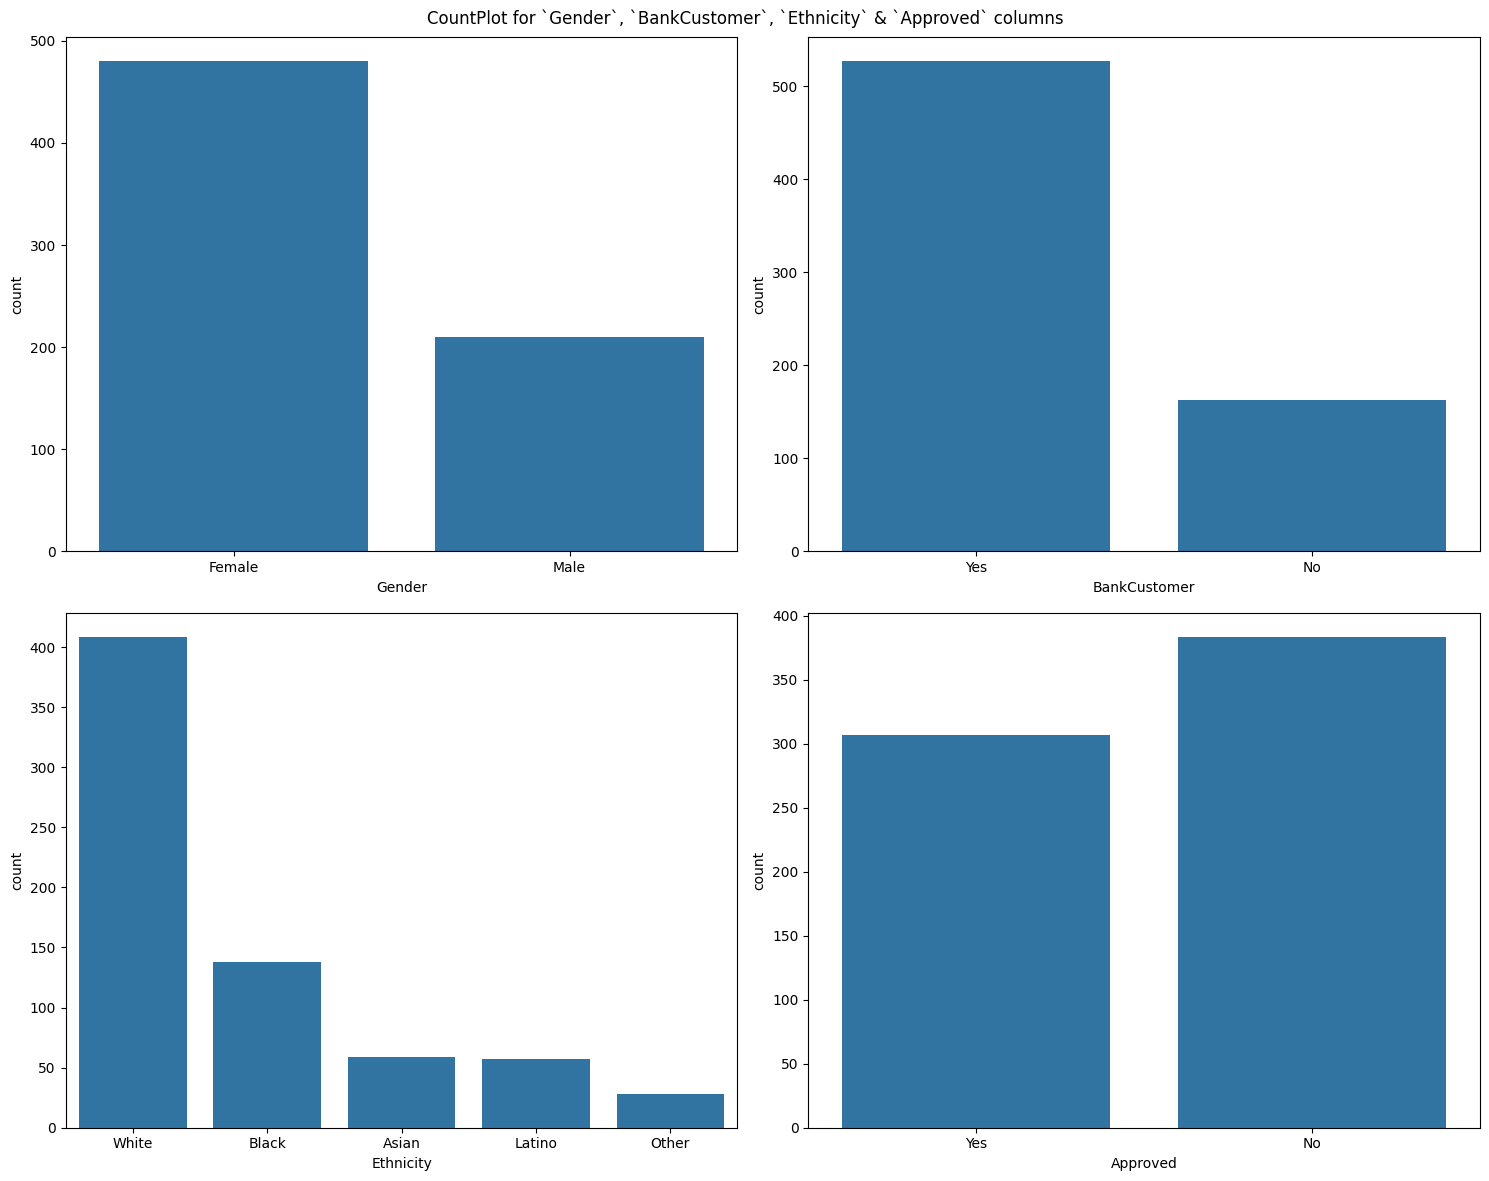

In [16]:
# Plot count for the Gender column
fig, ax = plt.subplots(2,2,figsize=(15,12))
fig.suptitle("CountPlot for `Gender`, `BankCustomer`, `Ethnicity` & `Approved` columns")

a = sns.countplot(ax = ax[0,0], data=df, x="Gender")
a.set_xticklabels(['Female', 'Male']);

b = sns.countplot(ax = ax[0,1], data=df, x="BankCustomer", legend='brief')
b.set_xticklabels(["Yes", "No"]);

sns.countplot(ax = ax[1,0], data=df, x="Ethnicity")

c = sns.countplot(ax = ax[1,1], data=df, x="Approved")
c.set_xticklabels(["Yes", "No"]);

plt.tight_layout()
plt.show();

*Observations:*


1. Males (Gender -1 ) applied more than women (Gender -0) did.
2. People having bank accounts applied more than people who don’t have bank accounts. This cause no surprise.
3. The trend in ethnicit ymight be due to the region the data was collected from.
4. The majority of applications were rejected, i.e., less than 50% of the applications were approved.

## 2.Bivariate Analysis

Bivariate analysis is slightly more analytical than Univariate analysis. When the data set contains two variables and aim is to undertake comparisons between the two features then Bivariate analysis is the right type of analysis technique.

### 2.1 Bivariate Analysis of Continuous Variables

In [17]:
df[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']].corr()

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.202177,0.391464,0.187327,0.018719
Debt,0.202177,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.391464,0.298902,1.000000,0.322330,0.051345
CreditScore,0.187327,0.271207,0.322330,1.000000,0.063692
Income,0.018719,0.123121,0.051345,0.063692,1.000000


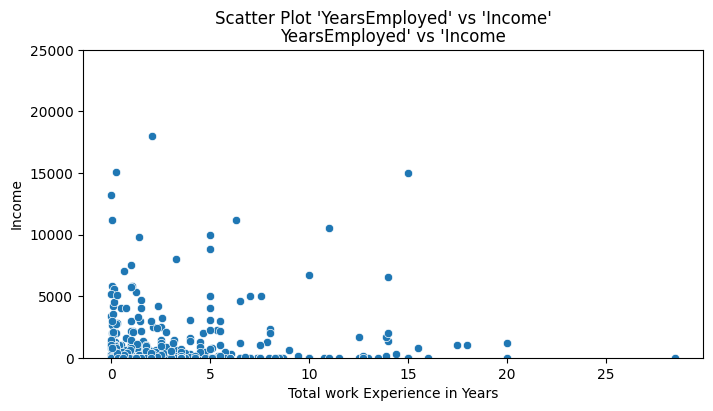

In [18]:
# Plotting scatter plot with YearsEmployed and Income
fig, ax = plt.subplots(figsize=(8,4))
fig.suptitle("Scatter Plot 'YearsEmployed' vs 'Income'")

a = sns.scatterplot(ax = ax, data=df, x="YearsEmployed", y="Income")
ax.set_title("YearsEmployed' vs 'Income")
ax.set_xlabel("Total work Experience in Years")
ax.set_ylabel("Income")

plt.ylim(0,25000)
plt.show();

## 2.2 Bivariate Analysis of Categorical Variables vs Continuous Variables

In [19]:
df.groupby(by='Approved').agg('mean')[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']]

<ipython-input-19-1b92205bf77a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Approved').agg('mean')[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']]


,Age,Debt,YearsEmployed,CreditScore,Income
Approved,,,,,
0,29.773029,3.839948,1.257924,0.631854,198.605744
1,33.686221,5.904951,3.427899,4.605863,2038.859935


<Axes: xlabel='Age', ylabel='Density'>

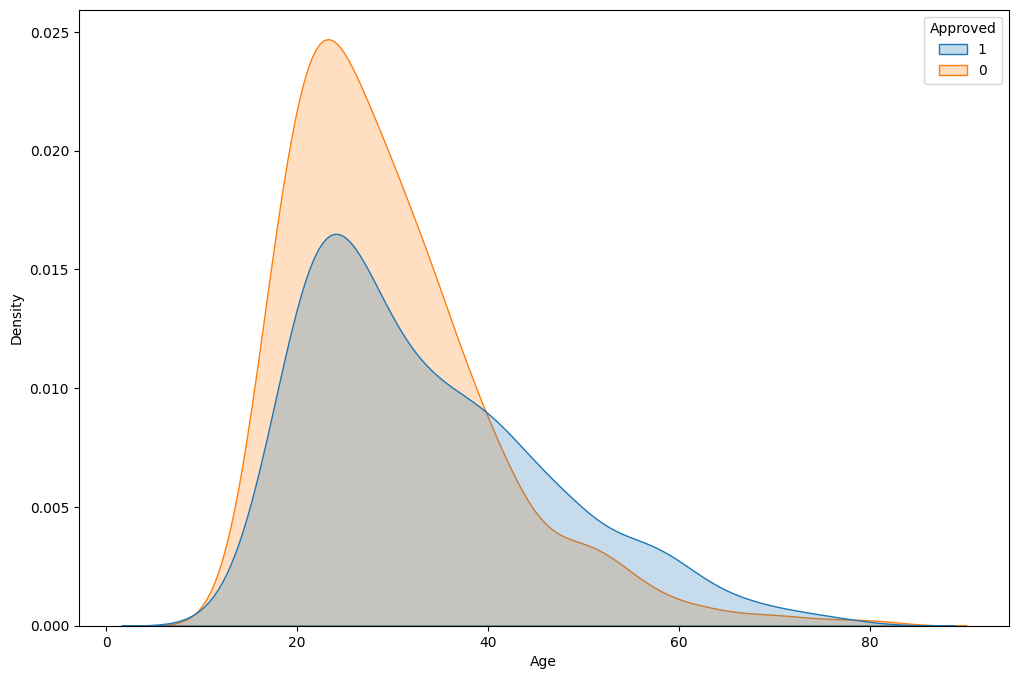

In [20]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x='Age', hue='Approved', fill=True)

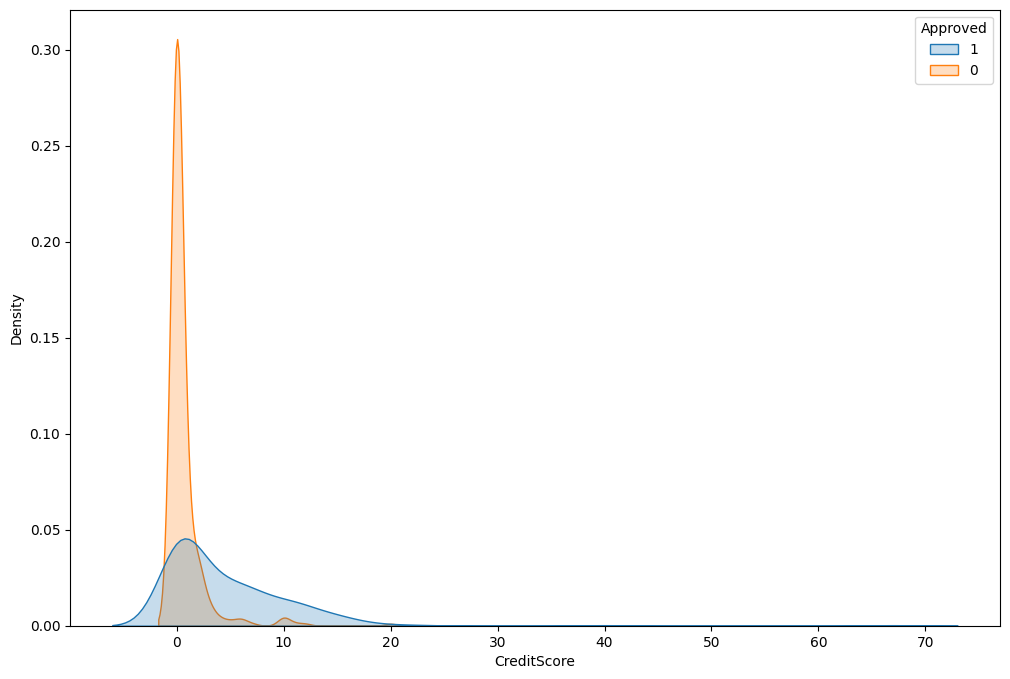

In [21]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x='CreditScore', hue='Approved', fill=True);

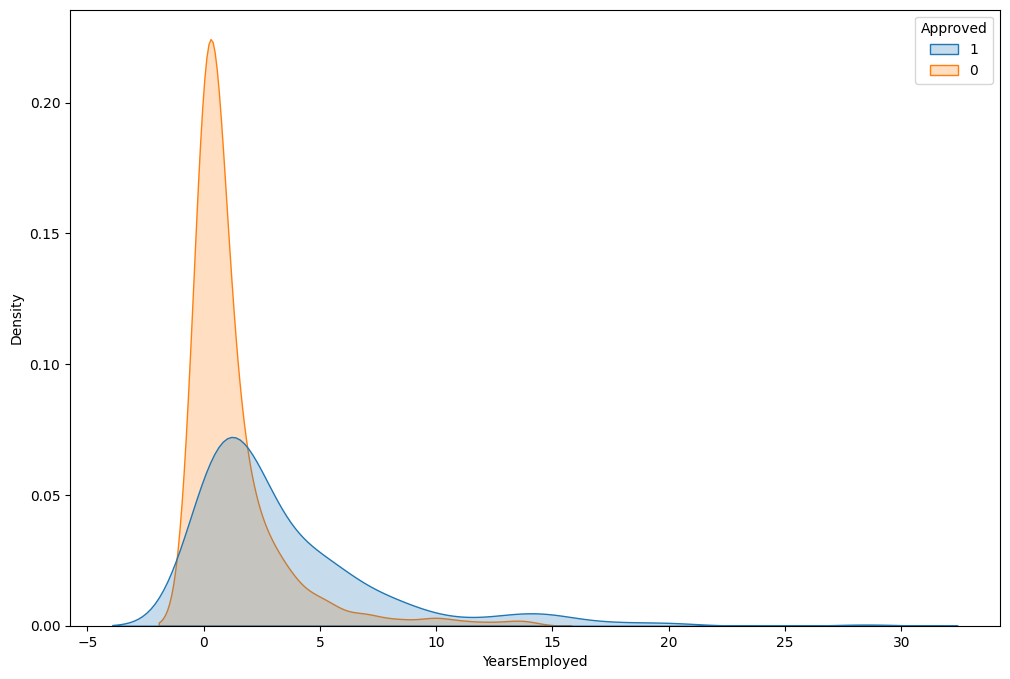

In [22]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x='YearsEmployed', hue='Approved', fill=True)
plt.show()

### 2.3 Bivariate Analysis of Categorical Variables vs Categorical Variables

Now,

**Countplot with Hue:** We will plot count plots of categorical variables with Hue='Approved'

<Axes: xlabel='Approved', ylabel='count'>

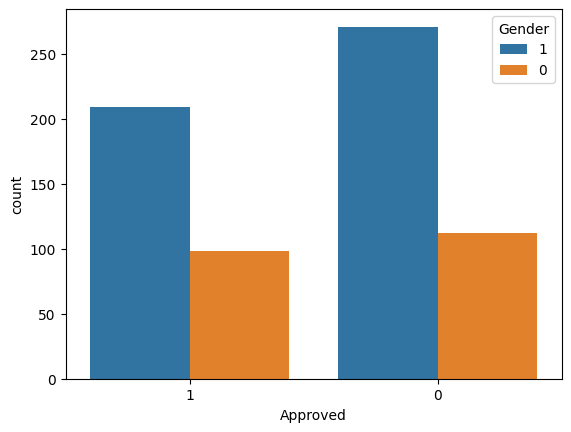

In [23]:
sns.countplot(data=df, x='Approved', hue='Gender')

In [24]:
pd.crosstab(df.Gender, df.Approved,margins=True)

Approved,0,1,All
Gender,,,
0,112,98,210
1,271,209,480
All,383,307,690


In [25]:
# To see the percentages
all = pd.crosstab(df.Gender, df.Approved,margins=True)['All']
pd.crosstab(df.Gender, df.Approved,margins=True).divide(all, axis=0)

Approved,0,1,All
Gender,,,
0,0.533333,0.466667,1.0
1,0.564583,0.435417,1.0
All,0.555072,0.444928,1.0


<ipython-input-26-ad0e576e89e1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(["Yes", "No"]);
<ipython-input-26-ad0e576e89e1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(["Yes", "No"]);
<ipython-input-26-ad0e576e89e1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(["Yes", "No"]);


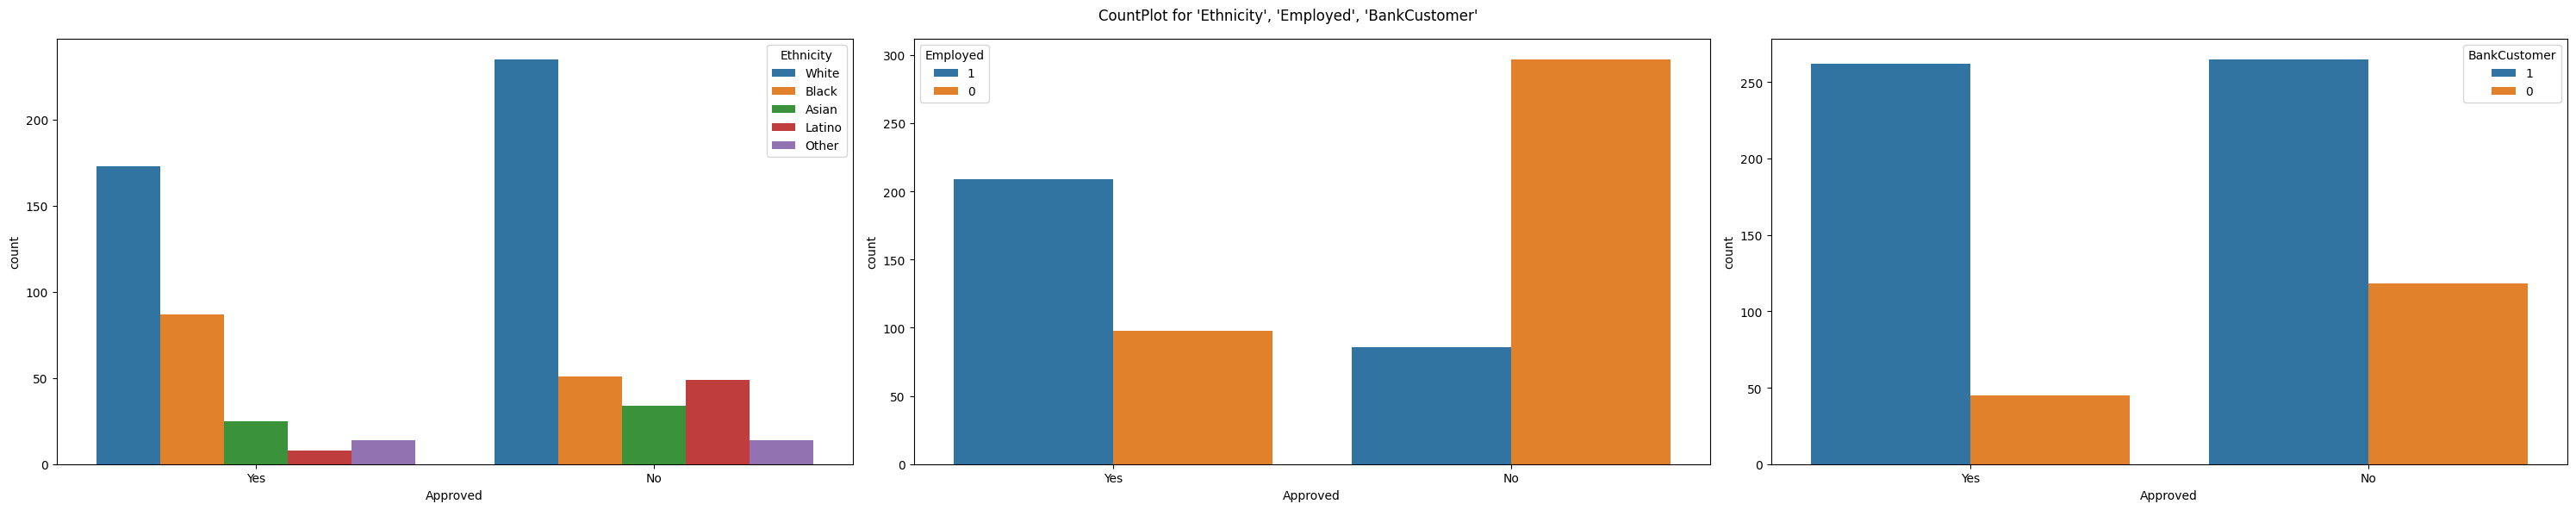

In [26]:
col = ['Ethnicity', 'Employed', 'BankCustomer']

# CountPlot
fig, ax = plt.subplots(1,3,figsize=(30,6))
fig.suptitle("CountPlot for 'Ethnicity', 'Employed', 'BankCustomer'")

a = sns.countplot(ax = ax[0], data=df, x="Approved", hue='Ethnicity')
a.set_xticklabels(["Yes", "No"]);

b = sns.countplot(ax = ax[1], data=df, x="Approved", hue='Employed', legend='brief')
b.set_xticklabels(["Yes", "No"]);

c = sns.countplot(ax = ax[2], data=df, x="Approved", hue='BankCustomer')
c.set_xticklabels(["Yes", "No"]);

plt.tight_layout()
plt.show();

## 3. Multivariate Analysis

**Multivariate analysis is a more complex form of a statistical analysis technique and is used when there are more than two variables in the data set.**

>Here, I will try to see relations between continuous variables and the 'Approved' column. To do that, we will plot a pair plot and heat plot to visualize the correlation, with Hue as Approved.

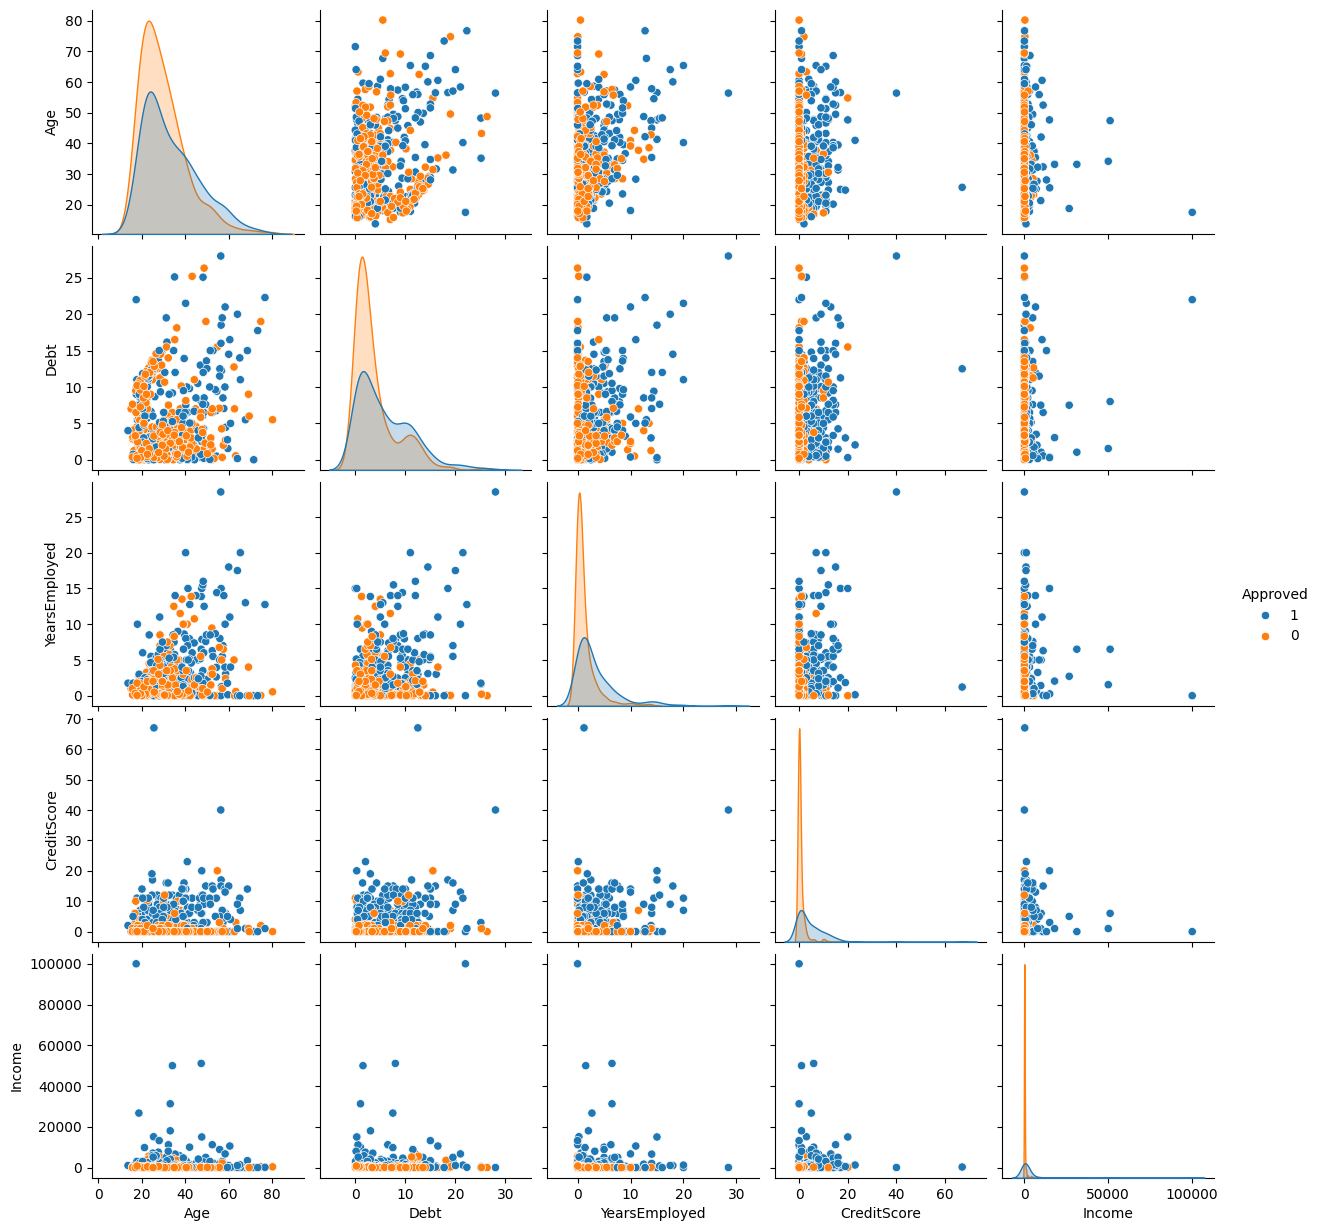

In [30]:
# creating a subset of the dataset
df_continuous = df[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income', 'Approved']].copy()

# Pairplot
sns.pairplot(data=df_continuous, hue='Approved')
plt.show()

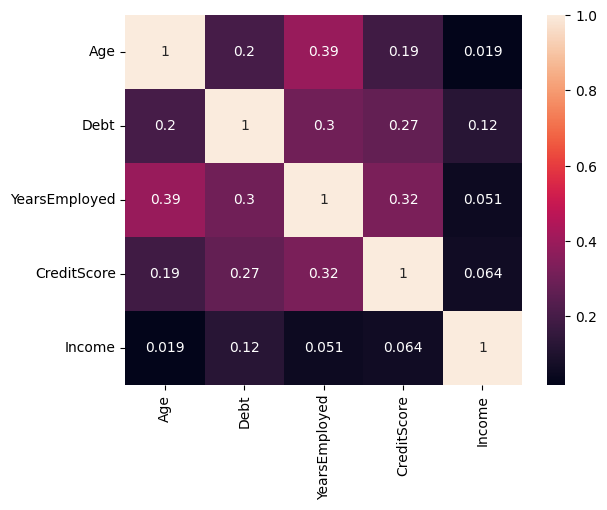

In [40]:
# Heatmap
sns.heatmap(df_continuous.iloc[:,:-1].corr(), annot=True );

**We don't see any pattern in the pair plot. But, again this can be used to see how two continuous features behave for different classes.**